### Baklazhenko Danila J4132. Practice work №2 - Algorithms of non-linear optimization. Direct methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from scipy import optimize

In [2]:
# Defining function for non-linear optimization methods

# Function 1: f(x) = x^3
def func_cube(x):
    return x**3

# Function 2: f(x) = |x - 0.2|
def func_abs(x):
    return(abs(x - 0.2))

# Function 3: f(x) = x * sin(1/x)
def func_sin(x):
    return x * np.sin(1/x)
 

eps = 0.001
a = 0
b = 1

#### Exhaustive search

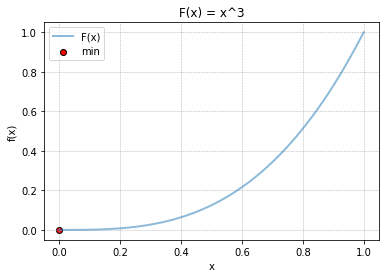

Function: F(x) = x^3
Number of iterations: 1001;
Number of function calculations: 1001;
Min value is [0 +- 0.001];


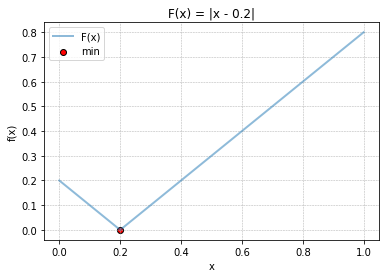

Function: F(x) = |x - 0.2|
Number of iterations: 1001;
Number of function calculations: 1001;
Min value is [0.2 +- 0.001];


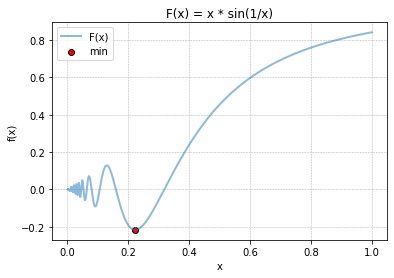

Function: F(x) = x * sin(1/x)
Number of iterations: 1000;
Number of function calculations: 1000;
Min value is [0.223 +- 0.001];


(0.223, 1000, 1000)

In [3]:
def exhaustive_search(a, b, eps, func, function_name):
    n = (b - a)/eps
    values = np.arange(a, b + eps, eps)
    min_value = func(values[0])
    min_index = 0
    iterations_num = 0
    func_iter_num = 0
    # Finding minimum
    for item in values:
        iterations_num += 1
        func_iter_num += 1
        val = func(item)
        if val < min_value:
            min_value = val
            min_index = item
    
    # Plotting results
    plt.plot(values, func(values), linewidth=2, label = 'F(x)', alpha = 0.5)
    plt.scatter(min_index, min_value, color = 'red', edgecolors = 'black' , label = 'min')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.title(function_name)
    plt.legend(loc = 'best')
    plt.show()
    
    print(f'Function: {function_name}\nNumber of iterations: {str(iterations_num)};\nNumber of function calculations: {str(func_iter_num)};')
    print(f'Min value is [{min_index} +- {eps}];')
    return(min_index, iterations_num, func_iter_num)

exhaustive_search(a, b, eps, func_cube, 'F(x) = x^3')
exhaustive_search(a, b, eps, func_abs, 'F(x) = |x - 0.2|')
exhaustive_search(a+eps, b, eps, func_sin, 'F(x) = x * sin(1/x)')

#### Dichotomy method

In [4]:
eps = 0.001

def dichotomy_search(a, b, eps, sig, func, function_name):
    iterations_num = 0
    func_iter_num = 0
    a0 = a
    b0 = b

    while abs(a0-b0) >= eps:
        x1 = ((a0+b0) - sig) / 2
        x2 = ((a0+b0) + sig) / 2
        if func(x1) <= func(x2):
            b0 = x2
        else: 
            a0 = x1
            
        iterations_num += 1
        func_iter_num += 2
    print(f'Function: {function_name} -  Number of iterations: {str(iterations_num)}; Number of function calculations: {str(func_iter_num)}')
    print(f'Min value lie in [{a0}, {b0}] range\n')
    return([a0, b0], iterations_num, func_iter_num)

sig = eps/2
dichotomy_search(a, b, eps, sig, func_cube, 'F(x) = x^3')
dichotomy_search(a, b, eps, sig, func_abs, 'F(x) = |x - 0.2|')
dichotomy_search(0.01, b, eps, sig, func_sin, 'F(x) = x * sin(1/x)')

Function: F(x) = x^3 -  Number of iterations: 11; Number of function calculations: 22
Min value lie in [0, 0.0009880371093750001] range

Function: F(x) = |x - 0.2| -  Number of iterations: 11; Number of function calculations: 22
Min value lie in [0.19960717773437495, 0.20059521484374995] range

Function: F(x) = x * sin(1/x) -  Number of iterations: 11; Number of function calculations: 22
Min value lie in [0.22210473632812497, 0.22308789062499995] range



([0.22210473632812497, 0.22308789062499995], 11, 22)

#### Golden section method

In [5]:
eps = 0.001

def oldbutgold_search(a, b, eps, func, function_name):
    a0 = a
    b0 = b
    
    # Set initial range and calculate function twice
    x1 = a0 + (3 - math.sqrt(5))/2 * (b0 - a0)
    x2 = b0 + (math.sqrt(5) - 3)/2 * (b0 - a0)
    f_x1 = func(x1)
    f_x2 = func(x2)
    
    # Set counters
    iterations_num = 1
    func_iter_num = 2

    #Iterate while range bigger than eps
    while abs(a0 - b0) >= eps:

        if f_x1 <= f_x2:
            b0 = x2
            x2 = x1
            f_x2 = f_x1
            x1 = a0 + (3 - math.sqrt(5))/2 * (b0 - a0)
            f_x1 = func(x1)
        else: 
            a0 = x1
            x1 = x2
            f_x1 = f_x2
            x2 = b0 + (math.sqrt(5) - 3)/2 * (b0 - a0)
            f_x2 = func(x2)
            
        iterations_num += 1
        func_iter_num += 1
        
    print(f'Function: {function_name} -  Number of iterations: {str(iterations_num)}; Number of function calculations: {str(func_iter_num)}')
    print(f'Min value lie in [{a0}, {b0}] range\n')
    return([a0, b0], iterations_num, func_iter_num)
        
oldbutgold_search(a, b, eps, func_cube, 'F(x) = x^3')
oldbutgold_search(a, b, eps, func_abs, 'F(x) = |x - 0.2|')
oldbutgold_search(a+eps, b, eps, func_sin, 'F(x) = x * sin(1/x)')

Function: F(x) = x^3 -  Number of iterations: 16; Number of function calculations: 17
Min value lie in [0, 0.000733137435857404] range

Function: F(x) = |x - 0.2| -  Number of iterations: 16; Number of function calculations: 17
Min value lie in [0.199706745025657, 0.2004398824615144] range

Function: F(x) = x * sin(1/x) -  Number of iterations: 16; Number of function calculations: 17
Min value lie in [0.22222463904651835, 0.2229570433449399] range



([0.22222463904651835, 0.2229570433449399], 16, 17)

#### Part 2

In [6]:
# Generate alpha and beta and fix them 
random.seed(10)
alpha = random.random()
beta = random.random()
print(alpha)
print(beta)
rang = range(0, 100)
x_data = [None] * len(rang)
y_data = [None] * len(rang)

#random.seed()
for k in rang:
    x_data[k] = k/100
    sig = random.normalvariate(0, 1)
    y_data[k] = alpha * x_data[k] + beta + sig

0.5714025946899135
0.4288890546751146


In [7]:
# Functions for approximation

def func_lin(x, a, b):
    return a*x + b

def func_rat(x, a, b):
    return (a / (1 + b*x))

def sq_func_lin(prms):
    a, b = prms
    res = 0
    for i in range(0, 100):
        res = res + (func_lin(x_data[i], a, b) - y_data[i])**2
    return res

def sq_func_rat(prms):
    a, b = prms
    res = 0
    for i in range(0, 100):
        res = res + (func_rat(x_data[i], a, b) - y_data[i])**2
    return res

eps = 0.001

#### Linear function approximation

#### Define methods 

In [8]:
# Exhaustive search method
def Exhaustive_approx(func):
    rranges = (slice(0, 1, eps), slice(0, 1, eps))
    resbrute = optimize.brute(func, rranges, finish = optimize.fmin)
    resbrute_approx = [resbrute[0] * x + resbrute[1] for x in x_data]
    resbrute_approx_rat = [resbrute[0]/(1 + resbrute[1]*x) for x in x_data]
    return(resbrute, resbrute_approx, resbrute_approx_rat)

# Gauss search method
def Gauss_coord_descent_approx(x, y, x0, func, step, eps, number_iterations = 100):
    iteration = 0
    a = x0[0]
    b = x0[1]
    
    f_values = [] 
    f_values.append(func([a,b]))
    
    while iteration < number_iterations:
        # Fix the value of argument b
        const_b_function = lambda a: func([a, b])
        a_items = np.arange(-1, 1, step)
        fk = list(map(const_b_function, a_items))
        fk = np.array(fk)
        index_a_min = np.argmin(fk)
        a_min = a_items[index_a_min]

        b_value = b
        f_values.append(min(fk))
        a = a_min

        # Fix the value of argument a
        const_a_function = lambda b: func([a, b])
        b_items = np.arange(-0.5, 2, step)
        fk = list(map(const_a_function, b_items))
        fk = np.array(fk)
        index_b_min = np.argmin(fk)
        b_min = b_items[index_b_min]
        
        a_value = a
        f_values.append(min(fk))
        b = b_min
        
        if abs(f_values[-1] - f_values[-2]) < eps:
            return(f_values, a_value, b_min,  iteration + 1)
            exit()
        else:
            iteration += 1
    return(f_values, iteration+1)


def Nelder_Mead_approx(func):
    params=[0.5, 0.5]
    res = optimize.minimize(func, params,  method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
    res_neld = res.x
    res_neld_aprox = [res_neld[0]*x+res_neld[1] for x in x_data]
    res_neld_rat_approx = [res_neld[0]/(1 + res_neld[1]*x) for x in x_data]
    return(res_neld, res_neld_aprox, res_neld_rat_approx)



#### Evaluate methods

In [9]:
# Evaluate Exhaustive minimization
resbrute, resbrute_approx, item = Exhaustive_approx(sq_func_lin)   
print( f'Exhaustive search method: a= {str(resbrute[0])}, b={str(resbrute[1])}')

# Evaluate Gauss minimization

f_values, a_val, b_val, num_iterations = Gauss_coord_descent_approx(x_data, y_data, [1.75, 0], sq_func_lin, step = 0.01, eps = 0.001)
resgauss_approx = [a_val* x + b_val for x in x_data]
print(f'Gauss search method: a= {str(a_val)}, b={str(b_val)}')
print(f'Iterations num = {num_iterations}; Number of function evaluations (for searching min) = {num_iterations * 2000}')

# Evaluate Nelder-Mead method minimization
res_neld, res_neld_aprox, item = Nelder_Mead_approx(sq_func_lin)   
print(f'Nelder-Mead search method: a= {str(res_neld[0])}, b={str(res_neld[1])}')

Exhaustive search method: a= 0.5083228103658561, b=0.5632855354203319
Gauss search method: a= 0.5300000000000014, b=0.5500000000000009
Iterations num = 11; Number of function evaluations (for searching min) = 22000
Optimization terminated successfully.
         Current function value: 92.354837
         Iterations: 54
         Function evaluations: 106
Nelder-Mead search method: a= 0.508311508651109, b=0.5633089015510742


#### Plotting results

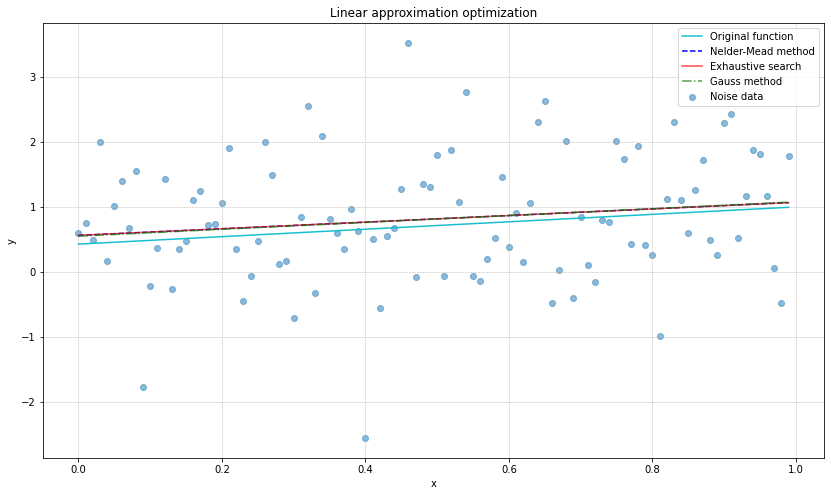

In [10]:
plt.rcParams['figure.figsize'] = [14, 8]
fig, pltx = plt.subplots()
pltx.plot(x_data, [alpha * item + beta for item in x_data], color='tab:cyan', label='Original function')
pltx.plot(x_data, res_neld_aprox, color='blue', linestyle = '--', label='Nelder-Mead method')
pltx.plot(x_data, resbrute_approx, color='red', alpha = 0.7, label='Exhaustive search')
pltx.plot(x_data, resgauss_approx, color='green', alpha = 0.7, linestyle = '-.', label='Gauss method')
pltx.scatter(x_data, y_data, label='Noise data', alpha = 0.5)
pltx.set(xlabel='x', ylabel='y',title='Linear approximation optimization')
pltx.grid(linestyle = '--', linewidth = 0.5)
pltx.legend(loc = 'best')
plt.show()

#### Rational regression

In [11]:
# Evaluate Exhaustive minimization
resbrute, resbrute_approx, resbrute_approx_rat  = Exhaustive_approx(sq_func_rat)   
print( f'Exhaustive search method: a= {str(resbrute[0])}, b={str(resbrute[1])}')

# Evaluate Gauss minimization
f_values, a_val, b_val, num_iterations = Gauss_coord_descent_approx(x_data, y_data, [1.75, 0], sq_func_rat, step = 0.01, eps = eps)
resgauss_approx = [a_val/(1 + b_val*x) for x in x_data]
print(f'Gauss search method: a= {str(a_val)}, b={str(b_val)}')
print(f'Iterations num = {num_iterations}; Number of function evaluations (for searchin min) = {num_iterations * 2000}')

# Evaluate Nelder-Mead method minimization
res_neld, res_neld_aprox, res_neld_rat = Nelder_Mead_approx(sq_func_rat)   
print(f'Nelder-Mead search method: a= {str(res_neld[0])}, b={str(res_neld[1])}')

Exhaustive search method: a= 0.6035151027573923, b=-0.4732490627191172
Gauss search method: a= 0.6200000000000014, b=-0.44999999999999996
Iterations num = 9; Number of function evaluations (for searchin min) = 18000
Optimization terminated successfully.
         Current function value: 92.244962
         Iterations: 102
         Function evaluations: 206
Nelder-Mead search method: a= 0.6034955745749151, b=-0.47327375049367304


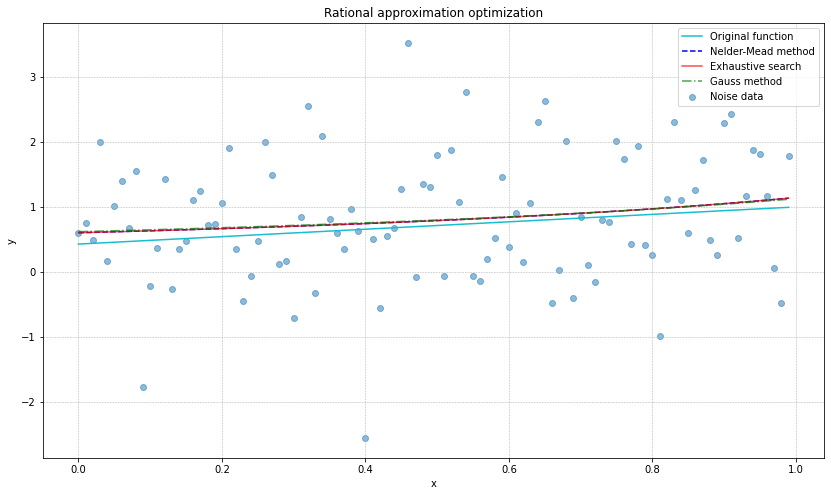

In [12]:
plt.rcParams['figure.figsize'] = [14, 8]
fig, pltx = plt.subplots()
pltx.plot(x_data, [alpha * item + beta for item in x_data], color='tab:cyan', label='Original function')
pltx.plot(x_data, res_neld_rat, color='blue', linestyle = '--', label='Nelder-Mead method')
pltx.plot(x_data, resbrute_approx_rat, color='red', alpha = 0.7, label='Exhaustive search')
pltx.plot(x_data, resgauss_approx, color='green', alpha = 0.7, linestyle = '-.', label='Gauss method')
pltx.scatter(x_data, y_data, label='Noise data', alpha = 0.5)
pltx.set(xlabel='x', ylabel='y',title='Rational approximation optimization')
pltx.grid(linestyle = '--', linewidth = 0.5)
pltx.legend(loc = 'best')
plt.show()